# [HSP]: Notebook 3 - Model Development & Training

In [1]:
# Import Libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from collections import Counter
import sklearn

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt


from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold,StratifiedKFold,ShuffleSplit,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.metrics import jaccard_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.decomposition import PCA

from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier


from category_encoders.one_hot import OneHotEncoder
from sklearn.compose import make_column_selector as selector
import mlflow
from mlflow.tracking import MlflowClient
from sklearn.impute import KNNImputer

In [31]:
# If it is on the local machine, please use the below code

# before running this code make sure you run the mlflow server to connect this port
mlflow.set_tracking_uri('http://localhost:5000')

In [62]:
# it create ECAP-Test experiment if not otherwise it activate the ecap-test experiment .
mlflow.set_experiment('HeartStroke_Prediction-Test')

MlflowException: API request to endpoint /api/2.0/mlflow/experiments/get-by-name failed with error code 404 != 200. Response body: '<!doctype html>
<html lang=en>
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>
'

In [4]:
# it create ECAP-Test experiment if not otherwise it activate the ecap-test experiment .
mlflow.set_experiment('Stroke_Prediction-Test')

<Experiment: artifact_location='mlflow-artifacts:/533179535798089171', creation_time=1689262281062, experiment_id='533179535798089171', last_update_time=1689262281062, lifecycle_stage='active', name='Stroke_Prediction-Test', tags={}>

In [5]:
### collecting the data

In [2]:

data_path = '..//data//raw//'

In [3]:
file_name = "healthcare-dataset-stroke-data.csv" # To be changed
df = pd.read_csv(data_path+file_name)

In [4]:
df.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.drop(["id"], axis=1, inplace = True)

In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
y = df['stroke']
df = df.drop(['stroke'], axis=1)
X = df.copy()

In [11]:
X = df.copy()
#Splitting data
train_features,test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.33, random_state=42,  stratify=y)

In [12]:
# class to column name transformer
from sklearn.base import BaseEstimator, TransformerMixin
class ColumnNameTransformer(TransformerMixin):

    def __init__(self, cols):
        self.cols = cols
        print(self.cols)

    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        X.columns = [c.replace(' ', '_') for c in X[self.cols]]
        self.cols = X.columns
        X.columns = [c.lower() for c in X[self.cols]]
        return X

In [13]:
# class to drop the cols which are not having any distribution
from sklearn.base import BaseEstimator, TransformerMixin
class DropColumns(TransformerMixin):

    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Xcols = X.drop(self.cols,axis=1)
        return Xcols

In [14]:
# class to drop the duplicates
from sklearn.base import BaseEstimator, TransformerMixin
class DropDuplicates(TransformerMixin):

    def __init__(self):
        return self

    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        X = X.drop_duplicates(keep='first',inplace=False)
        return X

In [15]:
class ClipTransformer(TransformerMixin):

    def __init__(self, a_min, a_max):
        self.a_min = a_min
        self.a_max = a_max
        self.col = col

    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Xclip = np.clip(X[self.col], self.a_min, self.a_max)
        return Xclip

In [16]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5, metric='nan_euclidean')),
    ('scaler', StandardScaler())
])

In [17]:
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent')),
       ('encoder', OneHotEncoder(use_cat_names=True))
])

In [18]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                # _names = [name + "__" + f for f in column]
                _names = [f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [56]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                # _names = [name + "__" + f for f in column]
                _names = [f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [19]:
## Preprocessing pipeline
numeric_features = list(train_features.select_dtypes(exclude='object').columns)
categorical_features = list(train_features.select_dtypes(include='object').columns)

preprocessor = ColumnTransformer(remainder='drop',
   transformers=[  
    ('numeric', numeric_transformer, selector(dtype_include=np.number)), 
    ('categorical', categorical_transformer, selector(dtype_include=object))
], verbose_feature_names_out=False)

In [20]:
print(numeric_features)
print(categorical_features)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [21]:
get_feature_names(preprocessor)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [22]:
from sklearn.svm import SVC

classifiers = {
    'RandomForestClassifier': Pipeline(steps=[
        ('pre_processing', preprocessor),
        ('clf_rfc', RandomForestClassifier())
    ]),
    
    'DecisionTreeClassifier': Pipeline(steps=[
        ('pre_processing', preprocessor),
        ('clf_dt', DecisionTreeClassifier())
    ]),
    
    'GradientBoostingClassifier': Pipeline(steps=[
        ('pre_processing', preprocessor),
        ('clf_gbc', GradientBoostingClassifier())
    ]),
    
    'LGBMClassifier': Pipeline(steps=[
        ('pre_processing', preprocessor),
        ('clf_lgbmc', LGBMClassifier())
    ]),
    
    'XGBClassifier': Pipeline(steps=[
        ('pre_processing', preprocessor),
        ('clf_xgbc', XGBClassifier())
    ])
}

classifiers['SVMClassifier'] = Pipeline(steps=[
    ('pre_processing', preprocessor),
    ('clf_svm', SVC())
])


## ACCURACY WITHOUT HYPER PARAMETER TUNING 

In [22]:
# Note: The run_name will be the name of the Model.

target_names = ['stroke']
for classifier_name, classifier in classifiers.items():
    with mlflow.start_run(run_name=classifier_name+' Model_Accuracy', tags={'Classifier Name':classifier_name}) as run:
        print("="*100)
        print("==>",classifier_name)
        classifier.fit(train_features,train_labels)
        score = classifier.score(test_features,test_labels)
        print(score)
        mlflow.sklearn.autolog(classifier)
    # end with
# end for

==> RandomForestClassifier
0.949021932424422
==> DecisionTreeClassifier
0.9098992294013041
==> GradientBoostingClassifier
0.94665085951393
==> LGBMClassifier
0.944872554831061
==> XGBClassifier
0.9407231772377
==> SVMClassifier
0.951393005334914


## ALL SCORES WITH OUT HYPER PARAMETER TUNING

In [23]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,confusion_matrix

target_names = ['stroke']
for classifier_name, classifier in classifiers.items():
    with mlflow.start_run(run_name=classifier_name+' all scores', tags={'Classifier Name': classifier_name }) as run:
        print("=" * 100)
        print("==> ", classifier_name)
        classifier.fit(train_features, train_labels)
        y_pred = classifier.predict(test_features)
        
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        accuracy = accuracy_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        cm = confusion_matrix(test_labels, y_pred)
        
        print("Precision:", precision)
        print("Recall:", recall)
        print("Accuracy:", accuracy)
        print("F1 Score:", f1)
        print("Confusion Matrix:")
        print(cm)
        
        mlflow.sklearn.autolog(classifier)
    # end with
# end for

==>  RandomForestClassifier
Precision: 0.0
Recall: 0.0
Accuracy: 0.949021932424422
F1 Score: 0.0
Confusion Matrix:
[[1601    4]
 [  82    0]]
==>  DecisionTreeClassifier
Precision: 0.14563106796116504
Recall: 0.18292682926829268
Accuracy: 0.9081209247184351
F1 Score: 0.16216216216216214
Confusion Matrix:
[[1517   88]
 [  67   15]]
==>  GradientBoostingClassifier
Precision: 0.16666666666666666
Recall: 0.024390243902439025
Accuracy: 0.94665085951393
F1 Score: 0.0425531914893617
Confusion Matrix:
[[1595   10]
 [  80    2]]
==>  LGBMClassifier
Precision: 0.17647058823529413
Recall: 0.036585365853658534
Accuracy: 0.944872554831061
F1 Score: 0.0606060606060606
Confusion Matrix:
[[1591   14]
 [  79    3]]
==>  XGBClassifier
Precision: 0.125
Recall: 0.036585365853658534
Accuracy: 0.9407231772377
F1 Score: 0.056603773584905655
Confusion Matrix:
[[1584   21]
 [  79    3]]
==>  SVMClassifier
Precision: 0.0
Recall: 0.0
Accuracy: 0.951393005334914
F1 Score: 0.0
Confusion Matrix:
[[1605    0]
 [  82

## HYPER PARAMETER TUNING RECALL

In [24]:
# Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

# Scoring metric
scoring = 'recall_macro'

# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'clf_dt__max_depth': [2, 4, 6],
    'clf_dt__min_samples_split': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for DecisionTreeClassifier
with mlflow.start_run(run_name="DecisionTreeClassifier-HPTuning1-Recall", tags={'Classifier Name': 'DecisionTreeClassifier'}) as run:
    grid_dt = GridSearchCV(estimator=classifiers['DecisionTreeClassifier'], param_grid=param_grid_dt, scoring=scoring, cv=cv, n_jobs=-1)
    grid_dt.fit(train_features, train_labels)
    
    best_params_dt = grid_dt.best_params_
    best_score_dt = grid_dt.best_score_
    
    mlflow.log_params(best_params_dt)
    mlflow.log_metric('Best Score', best_score_dt)
    
    predictions_dt = grid_dt.predict(test_features)
    recall_dt = recall_score(test_labels, predictions_dt, average='macro')
    mlflow.log_metric('Recall Score', recall_dt)
    
    print('Recall Score:', recall_dt)


2023/07/05 12:25:23 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:25:52 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.
2023/07/05 12:25:52 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler'

Recall Score: 0.4965732087227414


In [25]:
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

# Scoring metric
scoring = 'recall_macro'

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'clf_rfc__n_estimators': [50, 100, 150, 200],
    'clf_rfc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for RandomForestClassifier
with mlflow.start_run(run_name="RandomForestClassifier-HPTuning1-Recall", tags={'Classifier Name': 'RandomForestClassifier'}) as run:
    grid_rf = GridSearchCV(estimator=classifiers['RandomForestClassifier'], param_grid=param_grid_rf, scoring=scoring, cv=cv, n_jobs=-1)
    grid_rf.fit(train_features, train_labels)
    
    best_params_rf = grid_rf.best_params_
    best_score_rf = grid_rf.best_score_
    
    mlflow.log_params(best_params_rf)
    mlflow.log_metric('Best Score', best_score_rf)
    
    predictions_rf = grid_rf.predict(test_features)
    recall_rf = recall_score(test_labels, predictions_rf, average='macro')
    mlflow.log_metric('Recall Score', recall_rf)
    
    print('Recall Score:', recall_rf)


2023/07/05 12:25:57 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:26:26 INFO mlflow.sklearn.utils: Logging the 5 best runs, 7 runs will be omitted.
2023/07/05 12:26:26 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler'

Recall Score: 0.5


In [26]:
# Gradient Boosting Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

# Scoring metric
scoring = 'recall_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [50, 100, 150, 200],
    'clf_gbc__learning_rate': [0.01, 0.1, 1.0],
    'clf_gbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning1-Recall", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    recall_gbc = recall_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('Recall Score', recall_gbc)
    
    print('Recall Score:', recall_gbc)


2023/07/05 12:26:30 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:29:08 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 12:29:08 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

Recall Score: 0.5424169895904567


In [27]:
# LGBM CLASSIFIER
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

# Scoring metric
scoring = 'recall_macro'

# Define the parameter grid for LGBMClassifier
param_grid_lgb = {
    'clf_lgbmc__n_estimators': [50, 100, 150, 200],
    'clf_lgbmc__learning_rate': [0.01, 0.1, 1.0],
    'clf_lgbmc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for LGBMClassifier
with mlflow.start_run(run_name="LGBMClassifier-HPTuning1-Recall", tags={'Classifier Name': 'LGBMClassifier'}) as run:
    grid_lgb = GridSearchCV(estimator=classifiers['LGBMClassifier'], param_grid=param_grid_lgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_lgb.fit(train_features, train_labels)
    
    best_params_lgb = grid_lgb.best_params_
    best_score_lgb = grid_lgb.best_score_
    
    mlflow.log_params(best_params_lgb)
    mlflow.log_metric('Best Score', best_score_lgb)
    
    predictions_lgb = grid_lgb.predict(test_features)
    recall_lgb = recall_score(test_labels, predictions_lgb, average='macro')
    mlflow.log_metric('Recall Score', recall_lgb)
    
    print('Recall Score:', recall_lgb)


2023/07/05 12:29:19 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:30:17 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 12:30:17 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

Recall Score: 0.5366309550945977


In [28]:
# XGB classifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

# Scoring metric
scoring = 'recall_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [50, 100, 150, 200],
    'clf_xgbc__learning_rate': [0.01, 0.1, 1.0],
    'clf_xgbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning1-Recall", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    recall_xgb = recall_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('Recall Score', recall_xgb)
    
    print('Recall Score:', recall_xgb)


2023/07/05 12:30:21 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:31:34 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 12:31:34 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

2023/07/05 12:31:35 WARNING mlflow.utils: Truncated the value of the key `pre_processing`. Truncated value: `ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2E133B160>),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(...`
2023/07/05 12:31:35 WARNING mlflow.utils: Truncated the value of the key `clf_xgbc`. Truncated value: `XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=N

Recall Score: 0.5324025529974926


In [29]:
# SVMC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.svm import SVC

# Scoring metric
scoring = 'recall_macro'

# Define the parameter grid for SVM
param_grid_svm = {
    'clf_svm__C': [0.1, 1.0, 10.0],
    'clf_svm__kernel': ['linear', 'rbf'],
    'clf_svm__gamma': ['scale', 'auto']
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for SVM
with mlflow.start_run(run_name="SVMClassifier-HPTuning1-Recall", tags={'Classifier Name': 'SVMClassifier'}) as run:
    grid_svm = GridSearchCV(estimator=classifiers['SVMClassifier'], param_grid=param_grid_svm, scoring=scoring, cv=cv, n_jobs=-1)
    grid_svm.fit(train_features, train_labels)
    
    best_params_svm = grid_svm.best_params_
    best_score_svm = grid_svm.best_score_
    
    mlflow.log_params(best_params_svm)
    mlflow.log_metric('Best Score', best_score_svm)
    
    predictions_svm = grid_svm.predict(test_features)
    recall_svm = recall_score(test_labels, predictions_svm, average='macro')
    mlflow.log_metric('Recall Score', recall_svm)
    
    print('Recall Score:', recall_svm)


2023/07/05 12:31:39 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:32:12 INFO mlflow.sklearn.utils: Logging the 5 best runs, 7 runs will be omitted.
2023/07/05 12:32:12 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler'

Recall Score: 0.5084568041942101


## HYPER PARAMETER TUNING GBC AS IT GOT THE BEST RECAL SCORE TRYING WITH MULTIPLE PARAMETERS

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

# Scoring metric
scoring = 'recall_macro'

# Define the updated parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [100, 200, 300],
    'clf_gbc__learning_rate': [0.1, 0.5, 1.0],
    'clf_gbc__max_depth': [4, 6, 8],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning2-Recall", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    recall_gbc = recall_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('Recall Score', recall_gbc)
    
    print('Recall Score:', recall_gbc)


2023/07/05 12:32:15 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:34:47 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.
2023/07/05 12:34:47 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

Recall Score: 0.521943621305372


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

# Scoring metric
scoring = 'recall_macro'

# Define the updated parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [200, 300, 400],
    'clf_gbc__learning_rate': [0.1, 0.2, 0.3],
    'clf_gbc__max_depth': [6, 8, 10],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning3-Recall", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    recall_gbc = recall_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('Recall Score', recall_gbc)
    
    print('Recall Score:', recall_gbc)

2023/07/05 12:34:54 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:47:50 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.
2023/07/05 12:47:50 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

Recall Score: 0.5145543651698199


## F1 SCORE HYPER PARAMETER TUNING

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'clf_dt__max_depth': [2, 4, 6],
    'clf_dt__min_samples_split': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for DecisionTreeClassifier
with mlflow.start_run(run_name="DecisionTreeClassifier-HPTuning1-F1", tags={'Classifier Name': 'DecisionTreeClassifier'}) as run:
    grid_dt = GridSearchCV(estimator=classifiers['DecisionTreeClassifier'], param_grid=param_grid_dt, scoring=scoring, cv=cv, n_jobs=-1)
    grid_dt.fit(train_features, train_labels)
    
    best_params_dt = grid_dt.best_params_
    best_score_dt = grid_dt.best_score_
    
    mlflow.log_params(best_params_dt)
    mlflow.log_metric('Best Score', best_score_dt)
    
    predictions_dt = grid_dt.predict(test_features)
    f1_dt = f1_score(test_labels, predictions_dt, average='macro')
    mlflow.log_metric('F1 Score', f1_dt)
    
    print('F1 Score:', f1_dt)


2023/07/05 12:53:06 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:53:47 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.
2023/07/05 12:53:47 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler'

F1 Score: 0.4867660480681472


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'clf_rfc__n_estimators': [50, 100, 150, 200],
    'clf_rfc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for RandomForestClassifier
with mlflow.start_run(run_name="RandomForestClassifier-HPTuning1-F1", tags={'Classifier Name': 'RandomForestClassifier'}) as run:
    grid_rf = GridSearchCV(estimator=classifiers['RandomForestClassifier'], param_grid=param_grid_rf, scoring=scoring, cv=cv, n_jobs=-1)
    grid_rf.fit(train_features, train_labels)
    
    best_params_rf = grid_rf.best_params_
    best_score_rf = grid_rf.best_score_
    
    mlflow.log_params(best_params_rf)
    mlflow.log_metric('Best Score', best_score_rf)
    
    predictions_rf = grid_rf.predict(test_features)
    f1_rf = f1_score(test_labels, predictions_rf, average='macro')
    mlflow.log_metric('F1 Score', f1_rf)
    
    print('F1 Score:', f1_rf)


2023/07/05 12:53:53 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:54:22 INFO mlflow.sklearn.utils: Logging the 5 best runs, 7 runs will be omitted.
2023/07/05 12:54:22 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler'

F1 Score: 0.4875455650060753


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [50, 100, 150, 200],
    'clf_gbc__learning_rate': [0.01, 0.1, 1.0],
    'clf_gbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning1-F1", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    f1_gbc = f1_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('F1 Score', f1_gbc)
    
    print('F1 Score:', f1_gbc)


2023/07/05 12:54:25 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:56:03 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 12:56:03 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

F1 Score: 0.5781799424729631


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for LGBMClassifier
param_grid_lgbm = {
    'clf_lgbmc__n_estimators': [50, 100, 150, 200],
    'clf_lgbmc__learning_rate': [0.01, 0.1, 1.0],
    'clf_lgbmc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for LGBMClassifier
with mlflow.start_run(run_name="LGBMClassifier-HPTuning1-F1", tags={'Classifier Name': 'LGBMClassifier'}) as run:
    grid_lgbm = GridSearchCV(estimator=classifiers['LGBMClassifier'], param_grid=param_grid_lgbm, scoring=scoring, cv=cv, n_jobs=-1)
    grid_lgbm.fit(train_features, train_labels)
    
    best_params_lgbm = grid_lgbm.best_params_
    best_score_lgbm = grid_lgbm.best_score_
    
    mlflow.log_params(best_params_lgbm)
    mlflow.log_metric('Best Score', best_score_lgbm)
    
    predictions_lgbm = grid_lgbm.predict(test_features)
    f1_lgbm = f1_score(test_labels, predictions_lgbm, average='macro')
    mlflow.log_metric('F1 Score', f1_lgbm)
    
    print('F1 Score:', f1_lgbm)



2023/07/05 12:56:06 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:56:49 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 12:56:49 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

F1 Score: 0.5830624486855113


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [50, 100, 150, 200],
    'clf_xgbc__learning_rate': [0.01, 0.1, 1.0],
    'clf_xgbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning1-F1", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    f1_xgb = f1_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('F1 Score', f1_xgb)
    
    print('F1 Score:', f1_xgb)


2023/07/05 12:56:54 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:58:12 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 12:58:12 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

2023/07/05 12:58:13 WARNING mlflow.utils: Truncated the value of the key `pre_processing`. Truncated value: `ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2E133B160>),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(...`
2023/07/05 12:58:13 WARNING mlflow.utils: Truncated the value of the key `clf_xgbc`. Truncated value: `XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=N

F1 Score: 0.5144119106699753


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for SVMClassifier
param_grid_svm = {
    'clf_svm__C': [0.1, 1, 10],
    'clf_svm__kernel': ['linear', 'rbf'],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for SVMClassifier
with mlflow.start_run(run_name="SVMClassifier-HPTuning-F1", tags={'Classifier Name': 'SVMClassifier'}) as run:
    grid_svm = GridSearchCV(estimator=classifiers['SVMClassifier'], param_grid=param_grid_svm, scoring=scoring, cv=cv, n_jobs=-1)
    grid_svm.fit(train_features, train_labels)
    
    best_params_svm = grid_svm.best_params_
    best_score_svm = grid_svm.best_score_
    
    mlflow.log_params(best_params_svm)
    mlflow.log_metric('Best Score', best_score_svm)
    
    predictions_svm = grid_svm.predict(test_features)
    f1_svm = f1_score(test_labels, predictions_svm, average='macro')
    mlflow.log_metric('F1 Score', f1_svm)
    
    print('F1 Score:', f1_svm)


2023/07/05 12:58:15 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 12:58:38 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2023/07/05 12:58:38 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

F1 Score: 0.5068003864144804


## WITH SMOTE TECHNIQUE

In [23]:
## With Smote Technique
classifiers2 = {
    'RandomForestClassifier': Pipeline(steps=[
        ('pre_processing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf_rfc', RandomForestClassifier())
    ]),
    'DecisionTreeClassifier': Pipeline(steps=[
        ('pre_processing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf_dt', DecisionTreeClassifier())
    ]),
    'GradientBoostingClassifier': Pipeline(steps=[
        ('pre_processing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf_gbc', GradientBoostingClassifier())
    ]),
    'LGBMClassifier': Pipeline(steps=[
        ('pre_processing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf_lgbmc', LGBMClassifier())
    ]),
    'XGBClassifier': Pipeline(steps=[
        ('pre_processing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clf_xgbc', XGBClassifier())
    ])
}
classifiers2['SVMClassifier'] = Pipeline(steps=[
    ('pre_processing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf_svm', SVC())
])

## ALL SCORES AFTER SMOTE IMPLEMENTATION

In [39]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

target_names = ['stroke']

for classifier_name, classifier in classifiers2.items():
    with mlflow.start_run(run_name=classifier_name + ' all scores_smote', tags={'Classifier Name': classifier_name}) as run:
        print("=" * 100)
        print("==> ", classifier_name)
        
        # Fit the classifier with SMOTE applied to the training data
        classifier.fit(train_features, train_labels)
        
        # Predict on test data
        y_pred = classifier.predict(test_features)
        
        # Calculate evaluation metrics
        precision = precision_score(test_labels, y_pred)
        recall = recall_score(test_labels, y_pred)
        accuracy = accuracy_score(test_labels, y_pred)
        f1 = f1_score(test_labels, y_pred)
        cm = confusion_matrix(test_labels, y_pred)
        
        # Print evaluation metrics
        print("Precision:", precision)
        print("Recall:", recall)
        print("Accuracy:", accuracy)
        print("F1 Score:", f1)
        print("Confusion Matrix:")
        print(cm)
        
        # Log the evaluation metrics
        mlflow.log_metric('Precision', precision)
        mlflow.log_metric('Recall', recall)
        mlflow.log_metric('Accuracy', accuracy)
        mlflow.log_metric('F1 Score', f1)
#         mlflow.log_metric('Confusion Matrix', cm)
        
#         # Log the classifier parameters
#         mlflow.log_params(classifier.named_steps['clf_rfc'].get_params())
        
        # Log the trained model
        # Log the trained model
mlflow.sklearn.log_model(classifier, artifact_path="model", signature=None, input_example=None)

# end for



==>  RandomForestClassifier


2023/07/05 12:58:42 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/07/05 12:58:42 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, which is required in order to infer the signature
2023/07/05 12:58:42 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Precision: 0.0945945945945946
Recall: 0.08536585365853659
Accuracy: 0.915826911677534
F1 Score: 0.08974358974358976
Confusion Matrix:
[[1538   67]
 [  75    7]]
==>  DecisionTreeClassifier


2023/07/05 12:58:58 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/07/05 12:58:58 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, which is required in order to infer the signature
2023/07/05 12:58:58 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Precision: 0.12138728323699421
Recall: 0.25609756097560976
Accuracy: 0.8737403675163011
F1 Score: 0.16470588235294117
Confusion Matrix:
[[1453  152]
 [  61   21]]
==>  GradientBoostingClassifier


2023/07/05 12:59:11 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/07/05 12:59:11 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, which is required in order to infer the signature
2023/07/05 12:59:11 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Precision: 0.15591397849462366
Recall: 0.35365853658536583
Accuracy: 0.8755186721991701
F1 Score: 0.2164179104477612
Confusion Matrix:
[[1448  157]
 [  53   29]]
==>  LGBMClassifier


2023/07/05 12:59:24 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/07/05 12:59:24 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, which is required in order to infer the signature
2023/07/05 12:59:24 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Precision: 0.17567567567567569
Recall: 0.15853658536585366
Accuracy: 0.9229401304090101
F1 Score: 0.16666666666666669
Confusion Matrix:
[[1544   61]
 [  69   13]]
==>  XGBClassifier


2023/07/05 12:59:32 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/07/05 12:59:32 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, which is required in order to infer the signature
2023/07/05 12:59:32 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Precision: 0.1774193548387097
Recall: 0.13414634146341464
Accuracy: 0.9276822762299941
F1 Score: 0.1527777777777778
Confusion Matrix:
[[1554   51]
 [  71   11]]
==>  SVMClassifier


2023/07/05 12:59:41 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/07/05 12:59:41 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, which is required in order to infer the signature
2023/07/05 12:59:41 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Precision: 0.11357340720221606
Recall: 0.5
Accuracy: 0.7860106698280972
F1 Score: 0.18510158013544017
Confusion Matrix:
[[1285  320]
 [  41   41]]


## SMOTE HYPERPARAMETER TUNING

In [40]:
## DECISION TREE CLASSIFIER SMOTE HYPER PARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'clf_dt__max_depth': [2, 4, 6],
    'clf_dt__min_samples_split': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for DecisionTreeClassifier
with mlflow.start_run(run_name="DecisionTreeClassifier-HPTuning1-smote-F1", nested=True, tags={'Classifier Name': 'DecisionTreeClassifier'}) as run:
    grid_dt = GridSearchCV(estimator=classifiers2['DecisionTreeClassifier'], param_grid=param_grid_dt, scoring=scoring, cv=cv, n_jobs=-1)
    grid_dt.fit(train_features, train_labels)
    
    best_params_dt = grid_dt.best_params_
    best_score_dt = grid_dt.best_score_
    
    mlflow.log_params(best_params_dt)
    mlflow.log_metric('Best Score', best_score_dt)
    
    predictions_dt = grid_dt.predict(test_features)
    f1_dt = f1_score(test_labels, predictions_dt, average='macro')
    mlflow.log_metric('F1 Score', f1_dt)
    
    print('F1 Score:', f1_dt)


2023/07/05 13:00:19 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 13:00:40 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.
2023/07/05 13:00:40 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler'

F1 Score: 0.513224968740983


In [41]:


# # End the current run
# mlflow.end_run()




In [42]:
# mlflow.start_run(nested=True)

<ActiveRun: >

In [43]:
import mlflow
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'clf_rfc__n_estimators': [50, 100, 150, 200],
    'clf_rfc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# End any existing active run
mlflow.end_run()

# Hyperparameter tuning for RandomForestClassifier
with mlflow.start_run(run_name="RandomForestClassifier-HPTuning1-smote-F1", tags={'Classifier Name': 'RandomForestClassifier'}) as run:
    grid_rf = GridSearchCV(estimator=classifiers2['RandomForestClassifier'], param_grid=param_grid_rf, scoring=scoring, cv=cv, n_jobs=-1)
    grid_rf.fit(train_features, train_labels)
    
    best_params_rf = grid_rf.best_params_
    best_score_rf = grid_rf.best_score_
    
    mlflow.log_params(best_params_rf)
    mlflow.log_metric('Best Score', best_score_rf)
    
    predictions_rf = grid_rf.predict(test_features)
    f1_rf = f1_score(test_labels, predictions_rf, average='macro')
    mlflow.log_metric('F1 Score', f1_rf)
    
    print('F1 Score:', f1_rf)

# Code for the current run
...

# End the current run
mlflow.end_run()


2023/07/05 13:00:45 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 13:01:29 INFO mlflow.sklearn.utils: Logging the 5 best runs, 7 runs will be omitted.
2023/07/05 13:01:29 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler'

F1 Score: 0.5231230212573496


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [50, 100, 150, 200],
    'clf_gbc__learning_rate': [0.01, 0.1, 1.0],
    'clf_gbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning1-smote-F1", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    f1_gbc = f1_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('F1 Score', f1_gbc)
    
    print('F1 Score:', f1_gbc)


2023/07/05 13:01:33 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 13:05:14 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 13:05:15 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

F1 Score: 0.5640623297373869


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for LGBMClassifier
param_grid_lgbm = {
    'clf_lgbmc__n_estimators': [50, 100, 150, 200],
    'clf_lgbmc__learning_rate': [0.01, 0.1, 1.0],
    'clf_lgbmc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for LGBMClassifier
with mlflow.start_run(run_name="LGBMClassifier-HPTuning1-smote-F1", tags={'Classifier Name': 'LGBMClassifier'}) as run:
    grid_lgbm = GridSearchCV(estimator=classifiers2['LGBMClassifier'], param_grid=param_grid_lgbm, scoring=scoring, cv=cv, n_jobs=-1)
    grid_lgbm.fit(train_features, train_labels)
    
    best_params_lgbm = grid_lgbm.best_params_
    best_score_lgbm = grid_lgbm.best_score_
    
    mlflow.log_params(best_params_lgbm)
    mlflow.log_metric('Best Score', best_score_lgbm)
    
    predictions_lgbm = grid_lgbm.predict(test_features)
    f1_lgbm = f1_score(test_labels, predictions_lgbm, average='macro')
    mlflow.log_metric('F1 Score', f1_lgbm)
    
    print('F1 Score:', f1_lgbm)



2023/07/05 13:09:08 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 13:10:06 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 13:10:06 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

F1 Score: 0.5562105550813419


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [50, 100, 150, 200],
    'clf_xgbc__learning_rate': [0.01, 0.1, 1.0],
    'clf_xgbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning1-smote-F1", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers2['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    f1_xgb = f1_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('F1 Score', f1_xgb)
    
    print('F1 Score:', f1_xgb)

2023/07/05 13:11:01 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 13:15:52 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 13:15:52 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

2023/07/05 13:15:53 WARNING mlflow.utils: Truncated the value of the key `pre_processing`. Truncated value: `ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2E133B160>),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(...`
2023/07/05 13:15:53 WARNING mlflow.utils: Truncated the value of the key `clf_xgbc`. Truncated value: `XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=N

F1 Score: 0.5720993561452317


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for SVMClassifier
param_grid_svm = {
    'clf_svm__C': [0.1, 1, 10],
    'clf_svm__kernel': ['linear', 'rbf'],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for SVMClassifier
with mlflow.start_run(run_name="SVMClassifier-HPTuning-smote-F1", tags={'Classifier Name': 'SVMClassifier'}) as run:
    grid_svm = GridSearchCV(estimator=classifiers2['SVMClassifier'], param_grid=param_grid_svm, scoring=scoring, cv=cv, n_jobs=-1)
    grid_svm.fit(train_features, train_labels)
    
    best_params_svm = grid_svm.best_params_
    best_score_svm = grid_svm.best_score_
    
    mlflow.log_params(best_params_svm)
    mlflow.log_metric('Best Score', best_score_svm)
    
    predictions_svm = grid_svm.predict(test_features)
    f1_svm = f1_score(test_labels, predictions_svm, average='macro')
    mlflow.log_metric('F1 Score', f1_svm)
    
    print('F1 Score:', f1_svm)


2023/07/05 13:16:15 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 13:18:24 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2023/07/05 13:18:24 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

F1 Score: 0.537253557346134


## XGB CLASSIFIER HYPER PARAMETER TUNING F1 SCORE SMOTE

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [100, 200, 300],
    'clf_xgbc__learning_rate': [0.01, 0.1, 0.3],
    'clf_xgbc__max_depth': [3, 4, 5],
    'clf_xgbc__subsample': [0.8, 1.0],
    'clf_xgbc__colsample_bytree': [0.8, 1.0],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning2-smote-F1", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers2['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    f1_xgb = f1_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('F1 Score', f1_xgb)
    
    print('F1 Score:', f1_xgb)


2023/07/05 13:18:39 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 13:25:36 INFO mlflow.sklearn.utils: Logging the 5 best runs, 103 runs will be omitted.
2023/07/05 13:25:36 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scale

2023/07/05 13:25:37 WARNING mlflow.utils: Truncated the value of the key `pre_processing`. Truncated value: `ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2E133B160>),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(...`
2023/07/05 13:25:37 WARNING mlflow.utils: Truncated the value of the key `clf_xgbc`. Truncated value: `XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=N

F1 Score: 0.5544541966347454


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [100, 200, 300],
    'clf_xgbc__learning_rate': [0.01, 0.1, 0.3],
    'clf_xgbc__max_depth': [3, 4, 5],
    'clf_xgbc__subsample': [0.8, 1.0],
    'clf_xgbc__colsample_bytree': [0.8, 1.0],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning3-smote-F1", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers2['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    f1_xgb = f1_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('F1 Score', f1_xgb)
    
    print('F1 Score:', f1_xgb)


2023/07/05 13:25:55 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 13:32:53 INFO mlflow.sklearn.utils: Logging the 5 best runs, 103 runs will be omitted.
2023/07/05 13:32:53 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scale

2023/07/05 13:32:54 WARNING mlflow.utils: Truncated the value of the key `pre_processing`. Truncated value: `ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2E133B160>),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(...`
2023/07/05 13:32:54 WARNING mlflow.utils: Truncated the value of the key `clf_xgbc`. Truncated value: `XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=N

F1 Score: 0.5957155579928953


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [100, 200, 300],
    'clf_xgbc__learning_rate': [0.01, 0.05, 0.1],
    'clf_xgbc__max_depth': [3, 5, 7],
    'clf_xgbc__min_child_weight': [1, 3, 5],
    'clf_xgbc__gamma': [0, 0.1, 0.2],
#     'clf_xgbc__subsample': [0.8, 1.0],
#     'clf_xgbc__colsample_bytree': [0.8, 1.0],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning4-smote-F1", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers2['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    f1_xgb = f1_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('F1 Score', f1_xgb)
    
    print('F1 Score:', f1_xgb)


2023/07/05 13:33:26 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 13:55:30 INFO mlflow.sklearn.utils: Logging the 5 best runs, 238 runs will be omitted.
2023/07/05 13:55:31 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scale

2023/07/05 13:55:31 WARNING mlflow.utils: Truncated the value of the key `pre_processing`. Truncated value: `ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2E133B160>),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(...`
2023/07/05 13:55:31 WARNING mlflow.utils: Truncated the value of the key `clf_xgbc`. Truncated value: `XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=N

F1 Score: 0.576349195061026


 ## GBC HYPER PARAMETER TUNING SMOTE

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [100, 200, 300],
    'clf_gbc__learning_rate': [0.01, 0.05, 0.1],
    'clf_gbc__max_depth': [3, 5, 7],
    'clf_gbc__min_samples_split': [2, 4, 6],
    'clf_gbc__min_samples_leaf': [1, 3, 5],
#     'clf_gbc__subsample': [0.8, 1.0],
#     'clf_gbc__max_features': ['sqrt', 'log2', None],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning2-smote-F1", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    f1_gbc = f1_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('F1 Score', f1_gbc)
    
    print('F1 Score:', f1_gbc)  
    
   


2023/07/05 13:56:23 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 14:36:52 INFO mlflow.sklearn.utils: Logging the 5 best runs, 238 runs will be omitted.
2023/07/05 14:36:52 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scale

F1 Score: 0.5580915640014353


In [53]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import mlflow

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [100, 200, 300],
    'clf_gbc__learning_rate': [0.01, 0.05, 0.1],
    'clf_gbc__max_depth': [3, 5, 7],
    'clf_gbc__min_samples_split': [2, 4, 6],
    'clf_gbc__min_samples_leaf': [1, 3, 5],
    # 'clf_gbc__subsample': [0.8, 1.0],
    # 'clf_gbc__max_features': ['sqrt', 'log2', None],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning3-smote-F1", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1, verbose=2)
    
    start_time = time.time()
    
    grid_gbc.fit(train_features, train_labels)

    end_time = time.time()
    elapsed_time = end_time - start_time

    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_

    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)

    predictions_gbc = grid_gbc.predict(test_features)
    f1_gbc = f1_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('F1 Score', f1_gbc)

    print('F1 Score:', f1_gbc)
    print('Elapsed Time:', elapsed_time)


2023/07/05 15:20:00 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


2023/07/05 16:01:17 INFO mlflow.sklearn.utils: Logging the 5 best runs, 238 runs will be omitted.
2023/07/05 16:01:17 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2E133B160>),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                            ...`
2023/07/05 16:01:17 WARNING mlflow.utils: Truncated the value of the key `pre_processing`. Truncated value: `ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardSca

F1 Score: 0.562259600708224
Elapsed Time: 2481.5528659820557


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [200, 400, 600],  # Updated values
    'clf_gbc__learning_rate': [0.1, 0.5, 1.0],  # Updated values
    'clf_gbc__max_depth': [3, 5, 7],
#     'clf_gbc__min_samples_split': [2, 4, 6],
#     'clf_gbc__min_samples_leaf': [1, 3, 5],
#     'clf_gbc__subsample': [0.8, 1.0],
#     'clf_gbc__max_features': ['sqrt', 'log2', None],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning4-smote-F1", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    f1_gbc = f1_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('F1 Score', f1_gbc)
    
    print('F1 Score:', f1_gbc)


2023/07/05 17:12:26 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 17:27:11 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.
2023/07/05 17:27:11 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

F1 Score: 0.5736037512201925


In [ ]:
# import time
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
# from sklearn.metrics import f1_score
# import mlflow

# # Scoring metric
# scoring = 'f1_macro'

# # Define the parameter grid for GradientBoostingClassifier
# param_grid_gbc = {
#     'clf_gbc__n_estimators': [100, 200, 300],
#     'clf_gbc__learning_rate': [0.01, 0.05, 0.1],
#     'clf_gbc__max_depth': [3, 5, 7],
#     'clf_gbc__min_samples_split': [2, 4, 6],
#     'clf_gbc__min_samples_leaf': [1, 3, 5],
#     'clf_gbc__subsample': [0.8, 1.0],
#     'clf_gbc__max_features': ['sqrt', 'log2', None],
# }

# # Cross-validation setup
# folds = 5
# cv = KFold(n_splits=folds, shuffle=True)

# # Hyperparameter tuning for GradientBoostingClassifier
# with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning5-smote-F1", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
#     grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1, verbose=2)
    
#     start_time = time.time()
    
#     grid_gbc.fit(train_features, train_labels)

#     end_time = time.time()
#     elapsed_time = end_time - start_time

#     best_params_gbc = grid_gbc.best_params_
#     best_score_gbc = grid_gbc.best_score_

#     mlflow.log_params(best_params_gbc)
#     mlflow.log_metric('Best Score', best_score_gbc)

#     predictions_gbc = grid_gbc.predict(test_features)
#     f1_gbc = f1_score(test_labels, predictions_gbc, average='macro')
#     mlflow.log_metric('F1 Score', f1_gbc)

#     print('F1 Score:', f1_gbc)
#     print('Elapsed Time:', elapsed_time)


In [ ]:
# import time
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
# from sklearn.metrics import f1_score
# import mlflow

# # Scoring metric
# scoring = 'f1_macro'

# # Define the updated parameter grid for GradientBoostingClassifier
# param_grid_gbc = {
#     'clf_gbc__n_estimators': [200, 400, 600],
#     'clf_gbc__learning_rate': [0.1, 0.5, 1.0],
#     'clf_gbc__max_depth': [4, 6, 8],
#     'clf_gbc__min_samples_split': [3, 5, 7],
#     'clf_gbc__min_samples_leaf': [2, 4, 6],
#     'clf_gbc__subsample': [0.9, 1.0],
#     'clf_gbc__max_features': ['sqrt', 'log2', None],
# }

# # Cross-validation setup
# folds = 5
# cv = KFold(n_splits=folds, shuffle=True)

# # Hyperparameter tuning for GradientBoostingClassifier
# with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning6-smote-F1", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
#     grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1, verbose=2)

#     start_time = time.time()

#     grid_gbc.fit(train_features, train_labels)

#     end_time = time.time()
#     elapsed_time = end_time - start_time

#     best_params_gbc = grid_gbc.best_params_
#     best_score_gbc = grid_gbc.best_score_

#     mlflow.log_params(best_params_gbc)
#     mlflow.log_metric('Best Score', best_score_gbc)

#     predictions_gbc = grid_gbc.predict(test_features)
#     f1_gbc = f1_score(test_labels, predictions_gbc, average='macro')
#     mlflow.log_metric('F1 Score', f1_gbc)

#     print('F1 Score:', f1_gbc)
#     print('Elapsed Time:', elapsed_time)

## SMOTE HYPERPARAMETER TUNING PRECISION

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'clf_dt__max_depth': [2, 4, 6],
    'clf_dt__min_samples_split': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for DecisionTreeClassifier
with mlflow.start_run(run_name="DecisionTreeClassifier-HPTuning1-smote-Precision", nested=True, tags={'Classifier Name': 'DecisionTreeClassifier'}) as run:
    grid_dt = GridSearchCV(estimator=classifiers2['DecisionTreeClassifier'], param_grid=param_grid_dt, scoring=scoring, cv=cv, n_jobs=-1)
    grid_dt.fit(train_features, train_labels)
    
    best_params_dt = grid_dt.best_params_
    best_score_dt = grid_dt.best_score_
    
    mlflow.log_params(best_params_dt)
    mlflow.log_metric('Best Score', best_score_dt)
    
    predictions_dt = grid_dt.predict(test_features)
    precision_dt = precision_score(test_labels, predictions_dt, average='macro')
    mlflow.log_metric('Precision Score', precision_dt)
    
    print('Precision Score:', precision_dt)



2023/07/05 16:04:43 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 16:05:03 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.
2023/07/05 16:05:03 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler'

Precision Score: 0.545972180092733


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'clf_rfc__n_estimators': [100, 200, 300],
    'clf_rfc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for RandomForestClassifier
with mlflow.start_run(run_name="RandomForestClassifier-HPTuning1-Precision", nested=True, tags={'Classifier Name': 'RandomForestClassifier'}) as run:
    grid_rf = GridSearchCV(estimator=classifiers2['RandomForestClassifier'], param_grid=param_grid_rf, scoring=scoring, cv=cv, n_jobs=-1)
    grid_rf.fit(train_features, train_labels)
    
    best_params_rf = grid_rf.best_params_
    best_score_rf = grid_rf.best_score_
    
    mlflow.log_params(best_params_rf)
    mlflow.log_metric('Best Score', best_score_rf)
    
    predictions_rf = grid_rf.predict(test_features)
    precision_rf = precision_score(test_labels, predictions_rf, average='macro')
    mlflow.log_metric('Precision Score', precision_rf)
    
    print('Precision Score:', precision_rf)


2023/07/05 16:07:56 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 16:08:44 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.
2023/07/05 16:08:44 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler'

Precision Score: 0.5411057217281955


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [100, 200, 300],
    'clf_gbc__learning_rate': [0.1, 0.2, 0.3],
     'clf_gbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning1-Precision", nested=True, tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    precision_gbc = precision_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('Precision Score', precision_gbc)
    
    print('Precision Score:', precision_gbc)


2023/07/05 16:13:08 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 16:16:34 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.
2023/07/05 16:16:34 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

Precision Score: 0.5667319915546221


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for LGBMClassifier
param_grid_lgbm = {
    'clf_lgbmc__n_estimators': [50, 100, 150, 200],
    'clf_lgbmc__learning_rate': [0.01, 0.1, 1.0],
    'clf_lgbmc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for LGBMClassifier
with mlflow.start_run(run_name="LGBMClassifier-HPTuning1-smote-Precision", tags={'Classifier Name': 'LGBMClassifier'}) as run:
    grid_lgbm = GridSearchCV(estimator=classifiers2['LGBMClassifier'], param_grid=param_grid_lgbm, scoring=scoring, cv=cv, n_jobs=-1)
    grid_lgbm.fit(train_features, train_labels)
    
    best_params_lgbm = grid_lgbm.best_params_
    best_score_lgbm = grid_lgbm.best_score_
    
    mlflow.log_params(best_params_lgbm)
    mlflow.log_metric('Best Score', best_score_lgbm)
    
    predictions_lgbm = grid_lgbm.predict(test_features)
    precision_lgbm = precision_score(test_labels, predictions_lgbm, average='macro')
    mlflow.log_metric('Precision Score', precision_lgbm)
    
    print('Precision Score:', precision_lgbm)


2023/07/05 16:17:54 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 16:18:57 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 16:18:57 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

Precision Score: 0.5507493885028797


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [50, 100, 150, 200],
    'clf_xgbc__learning_rate': [0.01, 0.1, 1.0],
    'clf_xgbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning1-smote-Precision", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers2['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    precision_xgb = precision_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('Precision Score', precision_xgb)
    
    print('Precision Score:', precision_xgb)


2023/07/05 16:20:02 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 16:22:09 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2023/07/05 16:22:09 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

2023/07/05 16:22:09 WARNING mlflow.utils: Truncated the value of the key `pre_processing`. Truncated value: `ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B2E133B160>),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(...`
2023/07/05 16:22:09 WARNING mlflow.utils: Truncated the value of the key `clf_xgbc`. Truncated value: `XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=N

Precision Score: 0.5512886068992385


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for SVMClassifier
param_grid_svm = {
    'clf_svm__C': [0.1, 1, 10],
    'clf_svm__kernel': ['linear', 'rbf'],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for SVMClassifier
with mlflow.start_run(run_name="SVMClassifier-HPTuning-smote-Precision", tags={'Classifier Name': 'SVMClassifier'}) as run:
    grid_svm = GridSearchCV(estimator=classifiers2['SVMClassifier'], param_grid=param_grid_svm, scoring=scoring, cv=cv, n_jobs=-1)
    grid_svm.fit(train_features, train_labels)
    
    best_params_svm = grid_svm.best_params_
    best_score_svm = grid_svm.best_score_
    
    mlflow.log_params(best_params_svm)
    mlflow.log_metric('Best Score', best_score_svm)
    
    predictions_svm = grid_svm.predict(test_features)
    precision_svm = precision_score(test_labels, predictions_svm, average='macro')
    mlflow.log_metric('Precision Score', precision_svm)
    
    print('Precision Score:', precision_svm)


2023/07/05 16:24:00 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 16:24:48 INFO mlflow.sklearn.utils: Logging the 5 best runs, one run will be omitted.
2023/07/05 16:24:48 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

Precision Score: 0.5561064057632399


## GBC HYPERPARAMETER TUNING SMOTE PRECISION

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [50, 100, 150],
    'clf_gbc__learning_rate': [0.01, 0.1, 1.0],
    'clf_gbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning2-Precision", nested=True, tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    precision_gbc = precision_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('Precision Score', precision_gbc)
    
    print('Precision Score:', precision_gbc)


2023/07/05 16:26:50 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 16:29:05 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.
2023/07/05 16:29:05 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

Precision Score: 0.5518463996553148


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [100, 200, 300],
    'clf_gbc__learning_rate': [0.01, 0.1, 1.0],
    'clf_gbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning3-Precision", nested=True, tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    precision_gbc = precision_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('Precision Score', precision_gbc)
    
    print('Precision Score:', precision_gbc)


2023/07/05 16:29:47 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 16:33:09 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.
2023/07/05 16:33:09 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

Precision Score: 0.557900406504065


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [200, 300, 400],
    'clf_gbc__learning_rate': [0.05, 0.1, 0.2],
    'clf_gbc__max_depth': [4, 6, 8],
    'clf_gbc__min_samples_split': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning2-Precision", nested=True, tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    precision_gbc = precision_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('Precision Score', precision_gbc)
    
    print('Precision Score:', precision_gbc)


2023/07/05 16:34:01 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_t...`
2023/07/05 17:02:25 INFO mlflow.sklearn.utils: Logging the 5 best runs, 76 runs will be omitted.
2023/07/05 17:02:25 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('pre_processing', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler

Precision Score: 0.5503324185697017


## PRECESION WITHOUT SMOTE

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'clf_dt__max_depth': [2, 4, 6],
    'clf_dt__min_samples_split': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for DecisionTreeClassifier
with mlflow.start_run(run_name="DecisionTreeClassifier-HPTuning1-Precision", nested=True, tags={'Classifier Name': 'DecisionTreeClassifier'}) as run:
    grid_dt = GridSearchCV(estimator=classifiers['DecisionTreeClassifier'], param_grid=param_grid_dt, scoring=scoring, cv=cv, n_jobs=-1)
    grid_dt.fit(train_features, train_labels)
    
    best_params_dt = grid_dt.best_params_
    best_score_dt = grid_dt.best_score_
    
    mlflow.log_params(best_params_dt)
    mlflow.log_metric('Best Score', best_score_dt)
    
    predictions_dt = grid_dt.predict(test_features)
    precision_dt = precision_score(test_labels, predictions_dt, average='macro')
    mlflow.log_metric('Precision Score', precision_dt)
    
    print('Precision Score:', precision_dt)

Precision Score: 0.4756242568370987


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'clf_rfc__n_estimators': [100, 200, 300],
    'clf_rfc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for RandomForestClassifier
with mlflow.start_run(run_name="RandomForestClassifier-HPTuning1-Precision", nested=True, tags={'Classifier Name': 'RandomForestClassifier'}) as run:
    grid_rf = GridSearchCV(estimator=classifiers['RandomForestClassifier'], param_grid=param_grid_rf, scoring=scoring, cv=cv, n_jobs=-1)
    grid_rf.fit(train_features, train_labels)
    
    best_params_rf = grid_rf.best_params_
    best_score_rf = grid_rf.best_score_
    
    mlflow.log_params(best_params_rf)
    mlflow.log_metric('Best Score', best_score_rf)
    
    predictions_rf = grid_rf.predict(test_features)
    precision_rf = precision_score(test_labels, predictions_rf, average='macro')
    mlflow.log_metric('Precision Score', precision_rf)
    
    print('Precision Score:', precision_rf)


Precision Score: 0.475696502667457


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [100, 200, 300],
    'clf_gbc__learning_rate': [0.1, 0.2, 0.3],
     'clf_gbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-HPTuning1-Precision", nested=True, tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1)
    grid_gbc.fit(train_features, train_labels)
    
    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_
    
    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)
    
    predictions_gbc = grid_gbc.predict(test_features)
    precision_gbc = precision_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('Precision Score', precision_gbc)
    
    print('Precision Score:', precision_gbc)

Precision Score: 0.5530282143185369


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for LGBMClassifier
param_grid_lgbm = {
    'clf_lgbmc__n_estimators': [50, 100, 150, 200],
    'clf_lgbmc__learning_rate': [0.01, 0.1, 1.0],
    'clf_lgbmc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for LGBMClassifier
with mlflow.start_run(run_name="LGBMClassifier-HPTuning1-smote-Precision", tags={'Classifier Name': 'LGBMClassifier'}) as run:
    grid_lgbm = GridSearchCV(estimator=classifiers['LGBMClassifier'], param_grid=param_grid_lgbm, scoring=scoring, cv=cv, n_jobs=-1)
    grid_lgbm.fit(train_features, train_labels)
    
    best_params_lgbm = grid_lgbm.best_params_
    best_score_lgbm = grid_lgbm.best_score_
    
    mlflow.log_params(best_params_lgbm)
    mlflow.log_metric('Best Score', best_score_lgbm)
    
    predictions_lgbm = grid_lgbm.predict(test_features)
    precision_lgbm = precision_score(test_labels, predictions_lgbm, average='macro')
    mlflow.log_metric('Precision Score', precision_lgbm)
    
    print('Precision Score:', precision_lgbm)

Precision Score: 0.5298964350475763


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [50, 100, 150, 200],
    'clf_xgbc__learning_rate': [0.01, 0.1, 1.0],
    'clf_xgbc__max_depth': [2, 4, 6],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning1-smote-Precision", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    precision_xgb = precision_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('Precision Score', precision_xgb)
    
    print('Precision Score:', precision_xgb)

Precision Score: 0.5759215219976219


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for SVMClassifier
param_grid_svm = {
    'clf_svm__C': [0.1, 1, 10],
    'clf_svm__kernel': ['linear', 'rbf'],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for SVMClassifier
with mlflow.start_run(run_name="SVMClassifier-HPTuning-smote-Precision", tags={'Classifier Name': 'SVMClassifier'}) as run:
    grid_svm = GridSearchCV(estimator=classifiers2['SVMClassifier'], param_grid=param_grid_svm, scoring=scoring, cv=cv, n_jobs=-1)
    grid_svm.fit(train_features, train_labels)
    
    best_params_svm = grid_svm.best_params_
    best_score_svm = grid_svm.best_score_
    
    mlflow.log_params(best_params_svm)
    mlflow.log_metric('Best Score', best_score_svm)
    
    predictions_svm = grid_svm.predict(test_features)
    precision_svm = precision_score(test_labels, predictions_svm, average='macro')
    mlflow.log_metric('Precision Score', precision_svm)
    
    print('Precision Score:', precision_svm)


Precision Score: 0.5561064057632399


## PRECISION XGBC HPT 2 WITHOUT SMOTE

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [100, 200, 300],
    'clf_xgbc__learning_rate': [0.01, 0.05, 0.1],
    'clf_xgbc__max_depth': [3, 5, 7],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning2-Precision", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    precision_xgb = precision_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('Precision Score', precision_xgb)
    
    print('Precision Score:', precision_xgb)


Precision Score: 0.6009358288770054


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [50, 100, 150],
    'clf_xgbc__learning_rate': [0.001, 0.01, 0.1],
    'clf_xgbc__max_depth': [4, 6, 8],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning3-Precision", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    precision_xgb = precision_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('Precision Score', precision_xgb)
    
    print('Precision Score:', precision_xgb)


Precision Score: 0.6127956172705575


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [100, 200, 300],
    'clf_xgbc__learning_rate': [0.001, 0.01, 0.1],
    'clf_xgbc__max_depth': [4, 6, 8],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning4-Precision", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    precision_xgb = precision_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('Precision Score', precision_xgb)
    
    print('Precision Score:', precision_xgb)


Precision Score: 0.5565342960288808


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [100, 150, 200],
    'clf_xgbc__learning_rate': [0.01, 0.1, 0.5],
    'clf_xgbc__max_depth': [4, 6, 8],
    'clf_xgbc__subsample': [0.6, 0.8, 1.0],
    'clf_xgbc__colsample_bytree': [0.6, 0.8, 1.0],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning5-Precision", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    precision_xgb = precision_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('Precision Score', precision_xgb)
    
    print('Precision Score:', precision_xgb)


Precision Score: 0.5759215219976219


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

# Scoring metric
scoring = 'precision_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [50, 100, 150],
    'clf_xgbc__learning_rate': [0.001, 0.01, 0.1],
    'clf_xgbc__max_depth': [4, 6, 8],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Threshold for predictions
threshold = 0.5

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-HPTuning6-Precision", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_prob = grid_xgb.predict_proba(test_features)
    predictions_thresholded = (predictions_prob[:, 1] >= threshold).astype(int)
    
    precision_xgb = precision_score(test_labels, predictions_thresholded, average='macro')
    mlflow.log_metric('Precision Score', precision_xgb)
    
    print('Precision Score:', precision_xgb)



Precision Score: 0.5473214285714285


## FINAL MODELS

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [100, 200, 300],
    'clf_xgbc__learning_rate': [0.01, 0.1, 0.3],
    'clf_xgbc__max_depth': [3, 4, 5],
    'clf_xgbc__subsample': [0.8, 1.0],
    'clf_xgbc__colsample_bytree': [0.8, 1.0],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-FINAL-F1", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers2['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    f1_xgb = f1_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('F1 Score', f1_xgb)
    
    print('F1 Score:', f1_xgb)


F1 Score: 0.5818285823243398


In [40]:
best_estimator=grid_xgb.best_estimator_

In [41]:
best_estimator

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ECB82CE2E0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(use_cat_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [42]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import mlflow

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'clf_gbc__n_estimators': [100, 200, 300],
    'clf_gbc__learning_rate': [0.01, 0.05, 0.1],
    'clf_gbc__max_depth': [3, 5, 7],
    'clf_gbc__min_samples_split': [2, 4, 6],
    'clf_gbc__min_samples_leaf': [1, 3, 5],
    'clf_gbc__subsample': [0.8, 1.0],
    'clf_gbc__max_features': ['sqrt', 'log2', None],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for GradientBoostingClassifier
with mlflow.start_run(run_name="GradientBoostingClassifier-final-F1", tags={'Classifier Name': 'GradientBoostingClassifier'}) as run:
    grid_gbc = GridSearchCV(estimator=classifiers2['GradientBoostingClassifier'], param_grid=param_grid_gbc, scoring=scoring, cv=cv, n_jobs=-1, verbose=2)
    
    start_time = time.time()
    
    grid_gbc.fit(train_features, train_labels)

    end_time = time.time()
    elapsed_time = end_time - start_time

    best_params_gbc = grid_gbc.best_params_
    best_score_gbc = grid_gbc.best_score_

    mlflow.log_params(best_params_gbc)
    mlflow.log_metric('Best Score', best_score_gbc)

    predictions_gbc = grid_gbc.predict(test_features)
    f1_gbc = f1_score(test_labels, predictions_gbc, average='macro')
    mlflow.log_metric('F1 Score', f1_gbc)

    print('F1 Score:', f1_gbc)
    print('Elapsed Time:', elapsed_time)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
F1 Score: 0.5926647516756172
Elapsed Time: 9234.028814792633


In [43]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import mlflow

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [100, 200, 300],
    'clf_xgbc__learning_rate': [0.01, 0.1, 0.3],
    'clf_xgbc__max_depth': [3, 4, 5],
    'clf_xgbc__subsample': [0.8, 1.0],
    'clf_xgbc__colsample_bytree': [0.8, 1.0],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-FINALMODEL-F1", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers2['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    f1_xgb = f1_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('F1 Score', f1_xgb)
    
    # Save the best model using pickle
    best_model = grid_xgb.best_estimator_
    pickle.dump(best_model, open("best_model.pkl", "wb"))
    
    # Log the best model in MLflow
    mlflow.sklearn.log_model(best_model, "best_model")
    
    print('F1 Score:', f1_xgb)

F1 Score: 0.5818285823243398


In [25]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import mlflow

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [100, 200, 300],
    'clf_xgbc__learning_rate': [0.01, 0.1, 0.3],
    'clf_xgbc__max_depth': [3, 4, 5],
    'clf_xgbc__subsample': [0.8, 1.0],
    'clf_xgbc__colsample_bytree': [0.8, 1.0],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)

# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="XGBClassifier-FINALMODEL2-F1", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    f1_xgb = f1_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('F1 Score', f1_xgb)
    
    # Save the best model using pickle
    best_model = grid_xgb.best_estimator_
    pickle.dump(best_model, open("best_model.pkl", "wb"))
    
    # Log the best model in MLflow
    mlflow.sklearn.log_model(best_model, "best_model")
    
    print('F1 Score:', f1_xgb)

F1 Score: 0.5440169628072606


In [37]:
best_estimator=grid_xgb.best_estimator_

In [38]:
best_estimator

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002967D9D8100>),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(use_cat_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [39]:
best_model

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002967D9D8100>),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(use_cat_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [26]:
model_pipeline = Pipeline(steps=[
    ('pre_processing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('XGBClassifier', XGBClassifier())
])

In [27]:
model_pipeline

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000296753284C0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(use_cat_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

 - F1 macro score gives equal weight to each class, regardless of the class size or distribution. It provides an overall measure of the model's performance across all classes.
 - We can use the F1 macro metric on a column containing binary (0, 1) values. The F1 macro score is a suitable evaluation metric for binary classification tasks with imbalanced datasets or when you want to consider the performance of both classes equally.

In [60]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import mlflow

# Scoring metric
scoring = 'f1_macro'

# Define the parameter grid for XGBClassifier
param_grid_xgb = {
    'clf_xgbc__n_estimators': [100, 200, 300],
    'clf_xgbc__learning_rate': [0.01, 0.1, 0.3],
    'clf_xgbc__max_depth': [3, 4, 5],
    'clf_xgbc__subsample': [0.8, 1.0],
    'clf_xgbc__colsample_bytree': [0.8, 1.0],
}

# Cross-validation setup
folds = 5
cv = KFold(n_splits=folds, shuffle=True)
classifier_name = "XGBClassifier"
classifier = "XGBC_Model"
# Hyperparameter tuning for XGBClassifier
with mlflow.start_run(run_name="FINAL MODEL", tags={'Classifier Name': 'XGBClassifier'}) as run:
    grid_xgb = GridSearchCV(estimator=classifiers2['XGBClassifier'], param_grid=param_grid_xgb, scoring=scoring, cv=cv, n_jobs=-1)
    grid_xgb.fit(train_features, train_labels)
    
    best_params_xgb = grid_xgb.best_params_
    best_score_xgb = grid_xgb.best_score_
    
    mlflow.log_params(best_params_xgb)
    mlflow.log_metric('Best Score', best_score_xgb)
    
    predictions_xgb = grid_xgb.predict(test_features)
    f1_xgb = f1_score(test_labels, predictions_xgb, average='macro')
    mlflow.log_metric('F1 Score', f1_xgb)
    
    # Save the best model using pickle
    best_model = grid_xgb.best_estimator_
    pickle.dump(best_model, open("best_model.pkl", "wb"))
    
    # Log the best model in MLflow
    mlflow.sklearn.log_model(best_model, "best_model")
    
    print('F1 Score:', f1_xgb)

MlflowException: API request to endpoint /api/2.0/mlflow/runs/create failed with error code 404 != 200. Response body: '<!doctype html>
<html lang=en>
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>
'

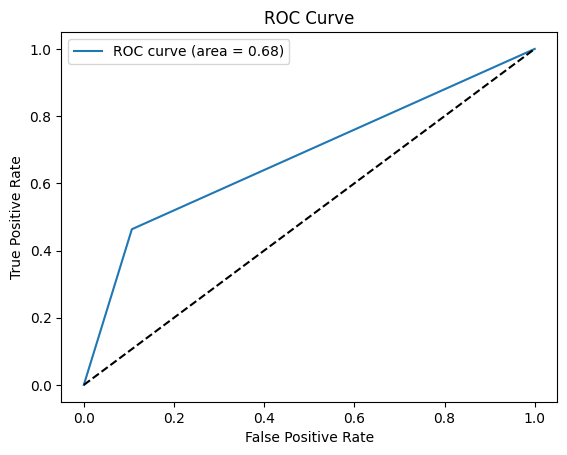

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, predictions_xgb)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


[[1434  171]
 [  44   38]]


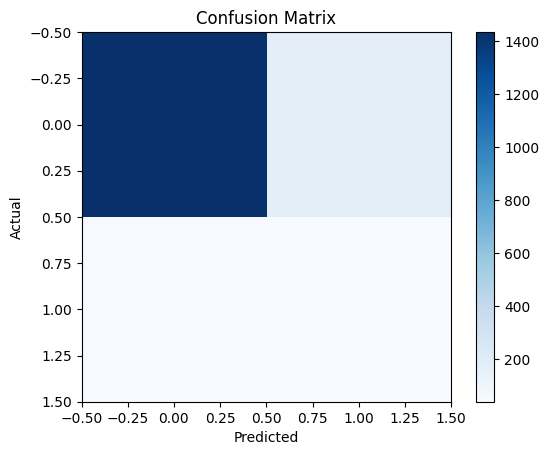

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, predictions_xgb)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
from xgboost import XGBClassifier

shap_model = XGBClassifier(seed=123)
shap_model.set_params(colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
X_train = model_pipeline.named_steps['pre_processing'].fit_transform(train_features)
X_train

array([[ 1.10369483, -0.32718565, -0.23765833, ...,  0.        ,
         0.        ,  0.        ],
       [-1.08135902, -0.32718565, -0.23765833, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.14828777, -0.32718565, -0.23765833, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.21513783, -0.32718565, -0.23765833, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79154428, -0.32718565, -0.23765833, ...,  0.        ,
         1.        ,  0.        ],
       [-1.66106719, -0.32718565, -0.23765833, ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
import mlflow.sklearn
import shap

mlflow.sklearn.autolog()
classifier_name = "XGBClassifier"
classifier = "Shap_XGBC_Model"

with mlflow.start_run(run_name="Final Shapash Model", tags={'Classifier Name': classifier_name}) as run:
    print(classifier_name)
   
    shap_model.fit(X_train, train_labels)
    
    # Save the Shapash model as an artifact
    mlflow.sklearn.log_model(shap_model, artifact_path="shapash_model")

XGBClassifier


In [35]:
shap_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [36]:
X_train.shape

(3423, 21)

In [5]:
data_path = '..//data//processed//'

In [6]:
file_name = "StrokePrediction.csv" # To be changed
df = pd.read_csv(data_path+file_name)

In [7]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [29]:
train_labels.shape

(3423,)